In [37]:
import os
import numpy as np
from PIL import Image

def load_data():
    data = []
    label = []
    for i in range(1, 41):
        for j in range(1, 11):
            img_path = f"./data/ORL人脸数据库/s{i}/{j}.bmp"
            img = np.array(Image.open(img_path))
            data.append(img.flatten())
            label.append(i)
            
    return np.array(data), np.array(label)   

In [38]:
all_data, all_label = load_data()
all_data
# all_label

array([[ 48,  49,  45, ...,  47,  46,  46],
       [ 60,  60,  62, ...,  32,  34,  34],
       [ 39,  44,  53, ...,  29,  26,  29],
       ...,
       [125, 119, 124, ...,  36,  39,  40],
       [119, 120, 120, ...,  89,  94,  85],
       [125, 124, 124, ...,  36,  35,  34]], dtype=uint8)

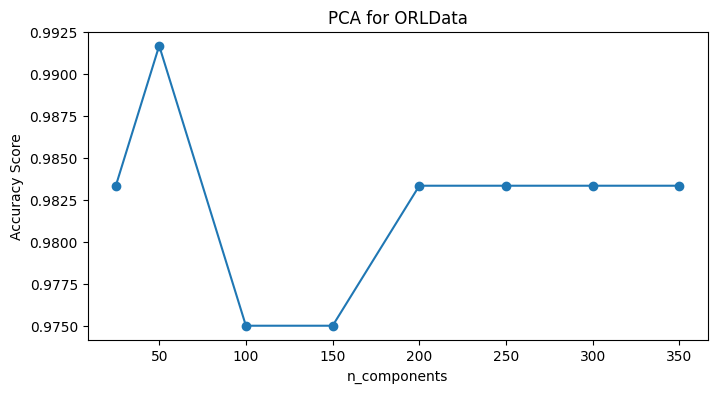

In [39]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

def train(X_train, y_train, n_neighbors):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    return knn

def test(knn, X_test, y_test):
    score = knn.score(X_test, y_test)
    return score

test_accuracy = []
n_components = [25, 50, 100, 150, 200, 250, 300, 350]
for c in n_components:
    
    pca = PCA(n_components=c)
    pca.fit(all_data)
    
    reduced_data = pca.transform(all_data)
    X_train, X_test, y_train, y_test = train_test_split(reduced_data, 
                                                        all_label, 
                                                        test_size=0.3, random_state=42)
    
    knn = train(X_train, y_train, 1)
    score = test(knn, X_test, y_test)
    test_accuracy.append(score)

plt.figure(figsize=(8, 4))
plt.plot(n_components, test_accuracy, marker='o')

plt.xlabel('n_components')
plt.ylabel('Accuracy Score')
plt.title('PCA for ORLData')
plt.show()
    
